In [149]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [150]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [151]:
df.isna().sum() 

year                       0
per capita income (US$)    0
dtype: int64

In [152]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

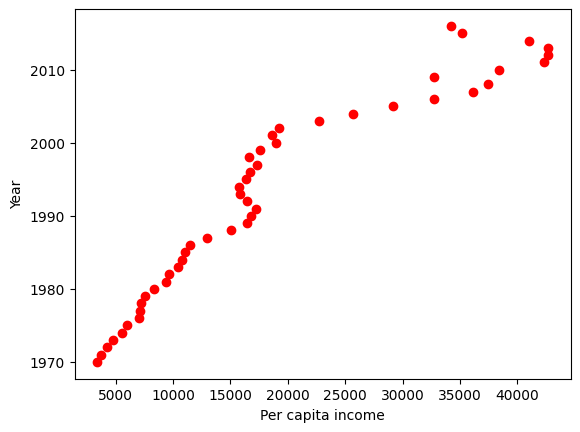

In [153]:
plt.scatter(y,x, color = 'red')
plt.xlabel('Per capita income')
plt.ylabel('Year')
plt.show()

In [154]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 42, shuffle = True)

In [155]:
## Now in this making Linear regression first
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

In [156]:
lg.fit(x_train,y_train)

LinearRegression()

In [157]:
y_pred_lg = lg.predict(x_test)

In [158]:
## Now decision Tree regression
from sklearn.tree import DecisionTreeRegressor

In [159]:
model = DecisionTreeRegressor(max_depth=3)
# The arguements given in this are called hyperparameters and giving more max_depth will overfit the model
# Less depth will underfit it

In [160]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [161]:
y_pred_Tree = model.predict(x_test)

In [162]:
newDf = pd.DataFrame({"Actual Income" : y_test, "LG Predicted Income" : y_pred_lg, "Tree Predicted Income" : y_pred_Tree})

In [163]:
newDf

,Actual Income,LG Predicted Income,Tree Predicted Income
27,17310.757750,22279.399682,16081.403349
39,32755.176820,32061.109839,39675.225163
26,16699.826680,21464.257169,16081.403349
43,42676.468370,35321.679891,39675.225163
24,15755.820270,19833.972143,16081.403349
36,32738.262900,29615.682300,29198.055690
12,9619.438377,10052.261987,10249.845244
19,16426.725480,15758.259578,16081.403349
4,5576.514583,3531.121883,5692.724148
25,16369.317250,20649.114656,16081.403349


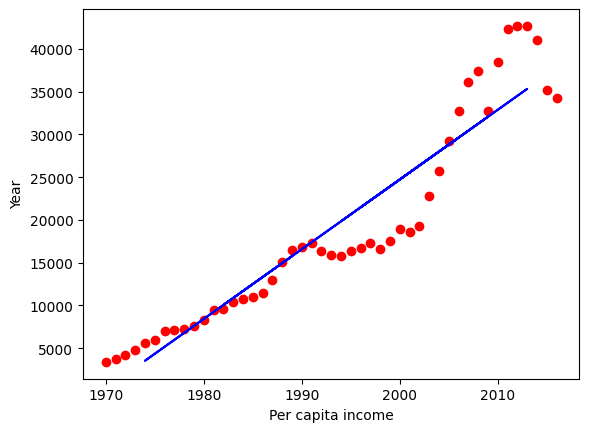

In [164]:
plt.scatter(x,y, color = 'red')
plt.xlabel('Per capita income')
plt.ylabel('Year')
plt.plot(x_test, y_pred_lg, color = 'blue')
plt.show()

In [165]:
from sklearn.metrics import r2_score, mean_squared_error

In [166]:
print("R2 score for linear regression is: ", r2_score(y_test, y_pred_lg))

R2 score for linear regression is:  0.8751771396846304


In [167]:
print("R2 score for tree is: ", r2_score(y_test, y_pred_Tree))

R2 score for tree is:  0.9406363823096681


### Visualisation of Decision tree

In [168]:
## making new values
years = np.arange(1950,2050,2)

In [169]:
model.predict(years.reshape(len(years),1))

c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([ 5692.72414756,  5692.72414756,  5692.72414756,  5692.72414756,
        5692.72414756,  5692.72414756,  5692.72414756,  5692.72414756,
        5692.72414756,  5692.72414756,  5692.72414756,  5692.72414756,
        5692.72414756,  5692.72414756,  5692.72414756, 10249.84524367,
       10249.84524367, 10249.84524367, 10249.84524367, 16081.40334875,
       16081.40334875, 16081.40334875, 16081.40334875, 16081.40334875,
       16081.40334875, 19890.0953725 , 19890.0953725 , 25719.14715   ,
       29198.05569   , 39675.22516333, 39675.22516333, 39675.22516333,
       39675.22516333, 34702.191305  , 34702.191305  , 34702.191305  ,
       34702.191305  , 34702.191305  , 34702.191305  , 34702.191305  ,
       34702.191305  , 34702.191305  , 34702.191305  , 34702.191305  ,
       34702.191305  , 34702.191305  , 34702.191305  , 34702.191305  ,
       34702.191305  , 34702.191305  ])

c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


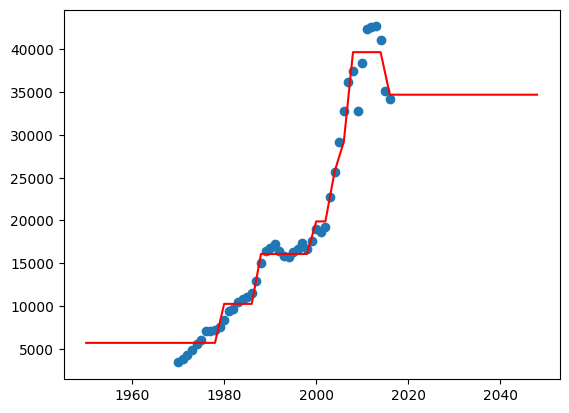

In [170]:
plt.scatter(x,y)
plt.plot(years, model.predict(years.reshape(len(years),1)), color='red')
plt.show()

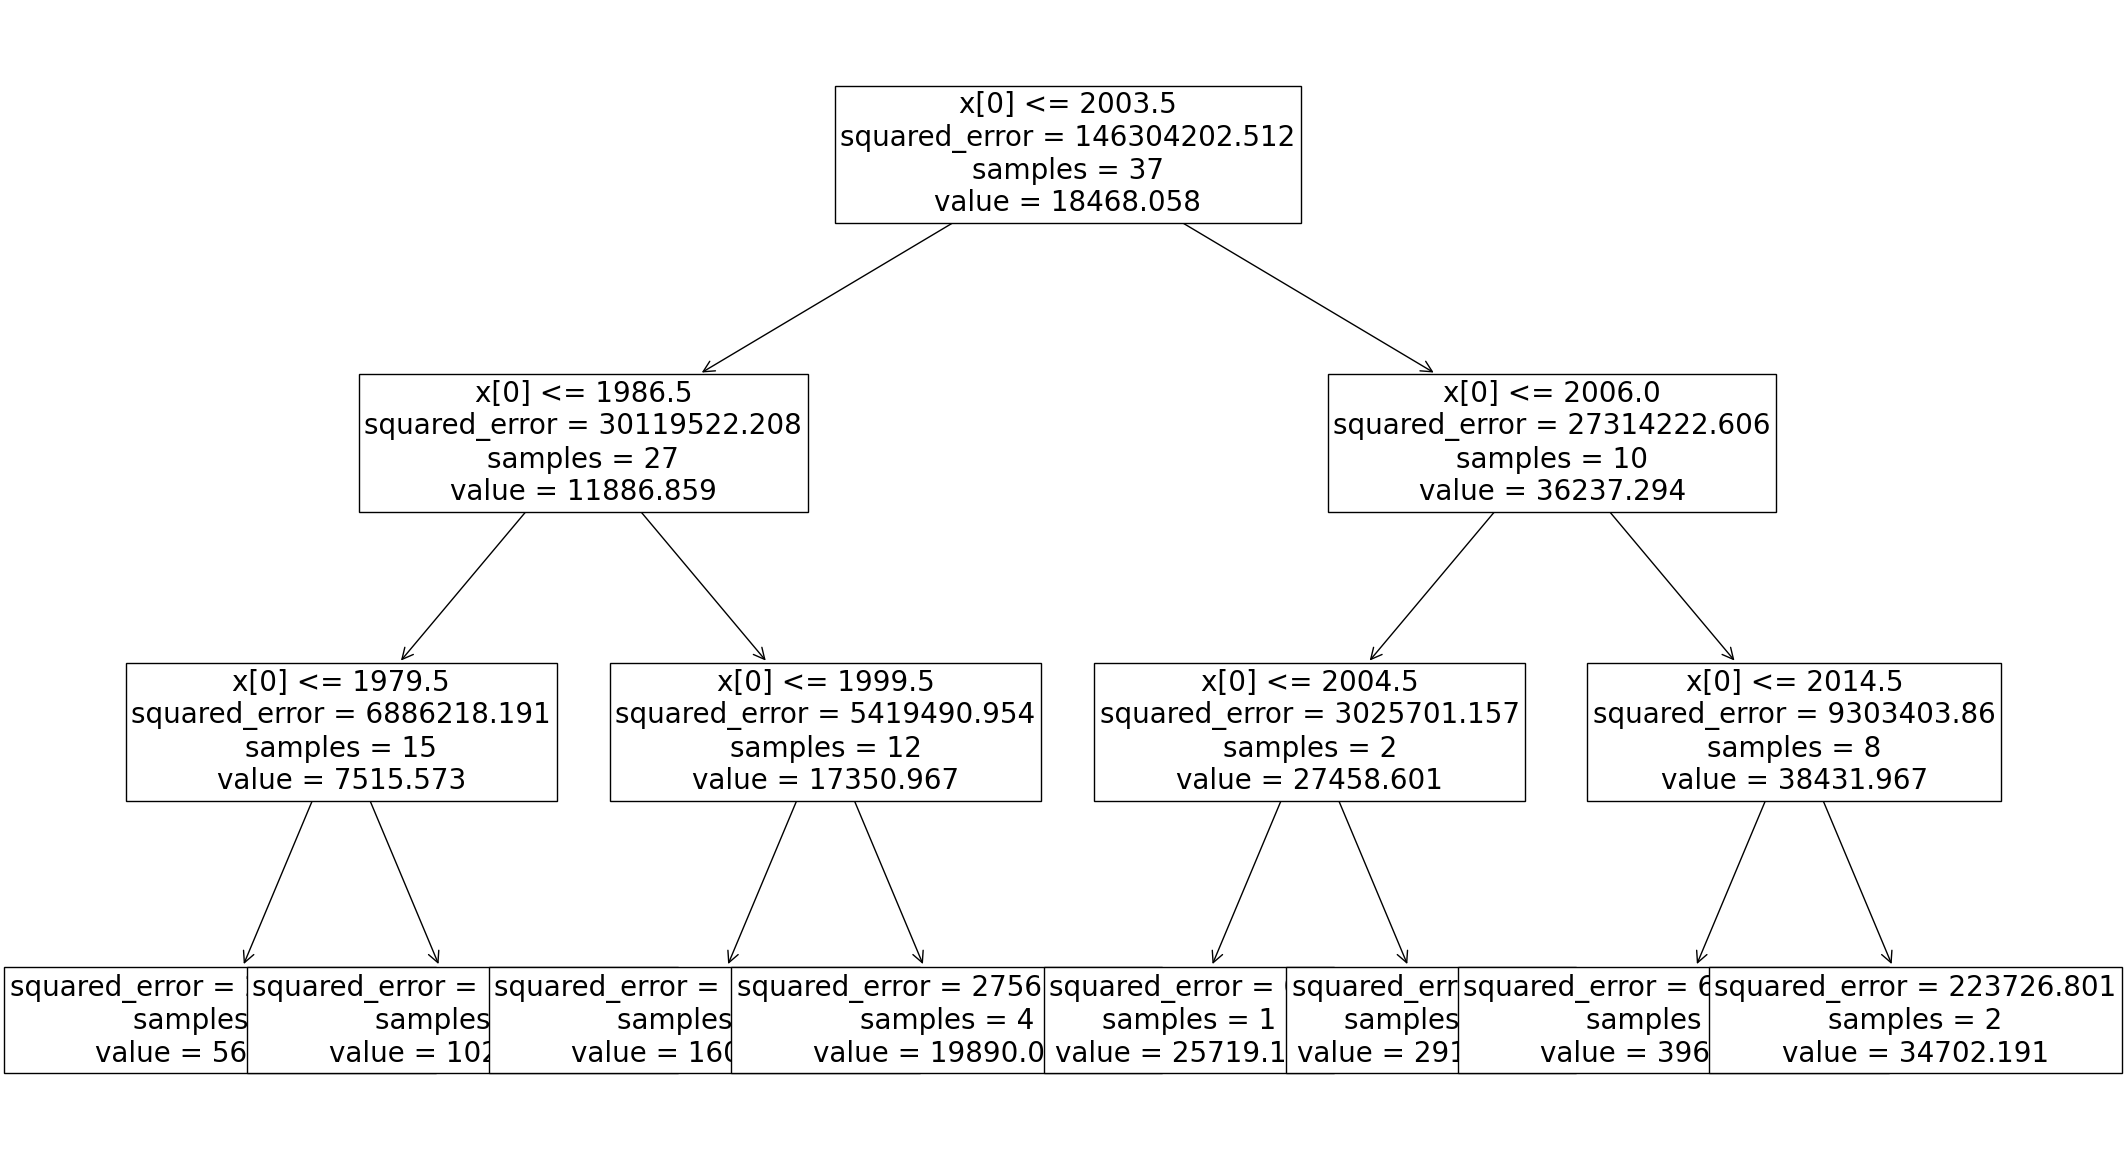

In [171]:
## Now plotting the tree
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(model,fontsize=20)
plt.show()